In [ ]:
!pip install arch
!pip install yfinance

In [ ]:
import arch
import statsmodels.api as sm
import yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
GetDJIinfo = yfinance.Ticker("^DJI")

DJIA = GetDJIinfo.history(period="max")
DJIA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0,0
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0,0
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0,0
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0,0
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0,0


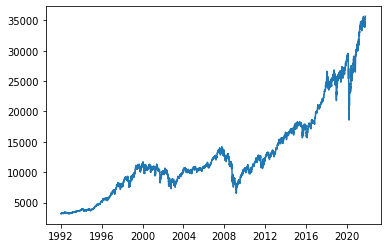

In [ ]:
plt.plot(DJIA['Close'])

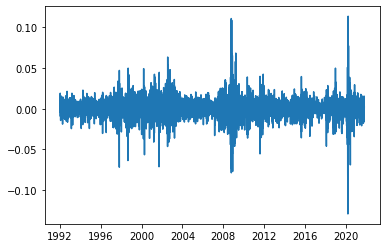

In [ ]:
returns = DJIA['Close'].pct_change().dropna()
plt.plot(returns)

In [ ]:
def calculate_volatility(array,window_size):
  volatility_array = np.zeros(len(array) - 2 * window_size)
  array = np.array(array)
  for i in range(len(array)-2*window_size):
    volatility_array[i] = np.var(array[i:i+window_size])
  return volatility_array

close_price_volatility = calculate_volatility(DJIA['Close'],5)
plt.plot(close_price_volatility)

In [ ]:
am = arch.arch_model(returns)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: -24862.923262393982
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -24862.923297288682
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                24862.9
Distribution:                  Normal   AIC:                          -49717.8
Method:            Maximum Likelihood   BIC:                          -49690.2
                                        No. Observations:                 7509
Date:                Sat, Oct 23 2021   Df Residuals:                     7508
Time:                        01:06:19   Df Model:                            1
        

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001243. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:755: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [ ]:
returns.autocorr()

-0.09164367416129784

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.00668626,  0.03957665, -0.0273951 ,  0.03246262, -0.03818932,
        -0.01594631, -0.02416555,  0.00843774,  0.00464093, -0.09034653,
         1.        , -0.09034653,  0.00464093,  0.00843774, -0.02416555,
        -0.01594631, -0.03818932,  0.03246262, -0.0273951 ,  0.03957665,
         0.00668626]),
 <matplotlib.lines.Line2D at 0x7f4be7efea10>)

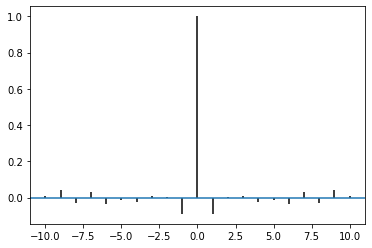

In [ ]:
plt.acorr(returns)